# **Global and Egypt Terrorism Analytics – Data-Driven Insights and Predictive Modeling**

This project investigates terrorism trends using the Global Terrorism Database (GTD), the world’s most comprehensive open-source dataset of terrorist events, covering over 200,000 incidents worldwide. The work combines data analysis and machine learning to uncover global terrorism patterns and provide a focused case study on Egypt. After extensive data cleaning and preprocessing, the project explores attack frequency, geographic hotspots, target types, and weapon usage, revealing both broad global dynamics and Egypt-specific insights. Through exploratory data analysis (EDA), visualization, and hypothesis testing, the project highlights critical factors shaping the evolution of terrorism.

Building on these insights, the project develops predictive models (Logistic Regression, Random Forest, Gradient Boosting) to classify and anticipate attack characteristics such as success probability and casualty severity. The outcomes include a clean, analysis-ready dataset, comprehensive visualizations, and validated models that support evidence-based counterterrorism strategies. By combining descriptive analytics with predictive modeling, this project demonstrates how AI-driven approaches can strengthen policy-making, improve situational awareness, and contribute to future terrorism prevention efforts at both the global and national (Egypt) levels.

Furthermore, this work emphasizes the importance of data-driven decision-making in security and governance. By identifying long-term terrorism patterns and predicting potential risk scenarios, governments, policymakers, and security agencies can allocate resources more effectively, anticipate threats, and design proactive interventions. The project also sets the foundation for integrating advanced machine learning and AI techniques with real-world security data, enabling continuous improvement in counterterrorism strategies. In doing so, it not only contributes academically to the field of AI and data science but also provides practical value for shaping safer societies in the face of global security challenges.

---

## **Data Exploration & Understanding**

## Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel") 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns too
pd.set_option("display.max_columns", None)

## Reading the data 

In [ ]:
data = pd.read_csv('data/raw/globalterrorismdb_0522dist.csv')

##  Understanding the Data 

In [7]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Na

### Data Dictionary

| Column         | Definition                                                | Example       |
| -------------- | --------------------------------------------------------- | ------------- |
| **eventid**    | Unique 12-digit ID (yyyymmdd####). First 8 digits = date. | 197003140002  |
| **iyear**      | Year of incident.                                         | 1970          |
| **imonth**     | Month (1–12; 0 if unknown).                               | 3             |
| **iday**       | Day of month (1–31; 0 if unknown).                        | 14            |
| **approxdate** | Textual approximate date if exact unknown.                | “Spring 1972” |
| **extended**   | 1 if incident lasted >24 hrs.                             | 0             |
| **resolution** | Date the incident ended (if extended).                    | “1972-02-21”  |
| **country**      | Country code (numeric).                       | 60                         |
| **country\_txt** | Country name.                                 | Egypt                      |
| **region**       | Region code.                                  | 10                         |
| **region\_txt**  | Region name.                                  | Middle East & North Africa |
| **provstate**    | Province/State/Governorate.                   | Cairo                      |
| **city**         | City name.                                    | Alexandria                 |
| **latitude**     | Decimal latitude.                             | 31.2                       |
| **longitude**    | Decimal longitude.                            | 29.9                       |
| **specificity**  | Location accuracy (1=city, 2=province, etc.). | 1                          |
| **vicinity**     | 1 if “near” city, not inside.                 | 0                          |
| **location**     | Free-text location description.               | “Near Suez Canal”          |
| **crit1**       | Political/Economic/Religious/Social motive?          | 1              |
| **crit2**       | Intention to coerce/intimidate/publicize?            | 1              |
| **crit3**       | Outside international humanitarian law?              | 1              |
| **doubtterr**   | Doubt this was terrorism? (1=yes, 0=no, -9=missing). | 0              |
| **alternative** | If not terrorism, other classification.              | 2 = Insurgency |
| **multiple**    | 1 if multiple related incidents.                     | 0              |
| **success**     | 1 if successful.                                     | 1              |
| **suicide**     | 1 if suicide attack.                                 | 0              |
| **attacktype1**        | Primary attack type code.             | 3                 |
| **attacktype1\_txt**   | Attack type description.              | Bombing/Explosion |
| **attacktype2/3**      | Secondary/tertiary attack type codes. | 1                 |
| **attacktype2/3\_txt** | Descriptions.                         | Assassination     |
| **targtype1**         | Primary target type code.       | 6                         |
| **targtype1\_txt**    | Target description.             | Airports & Aircraft       |
| **targsubtype1**      | Subtype code.                   | 42                        |
| **targsubtype1\_txt** | Subtype description.            | Aircraft (not at airport) |
| **corp1**             | Corporate/agency name.          | United Arab Airlines      |
| **target1**           | Specific target description.    | Flight Antonov 24         |
| **natlty1**           | Nationality code of target.     | 60                        |
| **natlty1\_txt**      | Nationality description.        | Egypt                     |
| **targtype2/3** …     | Secondary/Tertiary target info. | Military, Police          |
| **gname**       | Perpetrator group name.              | Black September     |
| **gsubname**    | Sub-group/faction.                   | Hamas military wing |
| **gname2/3**    | Secondary/Tertiary group names.      | “Unknown”           |
| **guncertain1** | Uncertainty about group attribution. | 0                   |
| **individual**  | Lone actor? (1=yes).                 | 0                   |
| **nperps**      | Number of perpetrators.              | 4                   |
| **nperpcap**    | Number captured.                     | 2                   |
| **weaptype1**         | Weapon type code.    | 6          |
| **weaptype1\_txt**    | Weapon type.         | Explosives |
| **weapsubtype1**      | Weapon subtype code. | 3          |
| **weapsubtype1\_txt** | Subtype description. | Grenade    |
| **weapdetail**        | Free-text details.   | TNT bomb   |
| **weaptype2/3/4**     | Secondary weapons.   | Firearms   |
| **nkill**       | Number killed.                  | 10                  |
| **nkillus**     | Number U.S. nationals killed.   | 0                   |
| **nkillter**    | Number terrorists killed.       | 2                   |
| **nwound**      | Number wounded.                 | 25                  |
| **nwoundus**    | Number U.S. wounded.            | 0                   |
| **nwoundte**    | Number terrorists wounded.      | 1                   |
| **property**    | Property damage (1=yes).        | 1                   |
| **propextent**  | Extent of damage code.          | 3 = Catastrophic    |
| **propvalue**   | Estimated property damage (\$). | 500000              |
| **propcomment** | Notes on damage.                | “Airport destroyed” |
| **ishostkid**   | Hostage-taking (1=yes).         | 1                   |
| **nhostkid**    | Number taken hostage.           | 50                  |
| **nhours**      | Duration of kidnapping (hours). | 72                  |
| **ndays**       | Duration (days).                | 3                   |
| **dbsource**      | Database source.       | PGIS                        |
| **summary**       | Free-text description. | “Bombing of Cairo airport…” |
| **scite1–scite3** | Source citations.      | Reuters, BBC                |
| **addnotes**      | Additional notes.      | “Possibly linked to…”       |
| **INT\_LOG**  | International logistics involvement. | 1       |
| **INT\_IDEO** | International ideology.              | 0       |
| **INT\_MISC** | Other international.                 | 0       |
| **INT\_ANY**  | Any international link.              | 1       |
| **related** | Event IDs of related incidents. | “197003140002,197003150001” |

In [8]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (209706, 135)


In [10]:
# Summary for each column
column_summary = pd.DataFrame({
    "dtype": data.dtypes,
    "missing_values": data.isnull().sum(),
    "unique_values": data.nunique()
})

print(column_summary)

                      dtype  missing_values  unique_values
eventid               int64               0         209706
iyear                 int64               0             50
imonth                int64               0             13
iday                  int64               0             32
approxdate           object          197017           3305
extended              int64               0              2
resolution           object          204845           3557
country               int64               0            204
country_txt          object               0            204
region                int64               0             12
region_txt           object               0             12
provstate            object               0           2623
city                 object             427          45147
latitude            float64            4691          64455
longitude           float64            4692          64273
specificity         float64               1             

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,209706.0,2.004867e+11,1.351933e+09,1.970000e+11,1.992080e+11,2.012010e+11,2.015123e+11,2.020123e+11
iyear,209706.0,2.004801e+03,1.351932e+01,1.970000e+03,1.992000e+03,2.012000e+03,2.015000e+03,2.020000e+03
imonth,209706.0,6.455285e+00,3.387098e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,209706.0,1.552793e+01,8.801104e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,209706.0,5.152452e-02,2.210655e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country,209706.0,1.302914e+02,1.117146e+02,4.000000e+00,6.900000e+01,9.800000e+01,1.600000e+02,1.004000e+03
region,209706.0,7.279854e+00,2.905697e+00,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01
latitude,205015.0,2.335870e+01,1.813706e+01,-5.315461e+01,1.151005e+01,3.130021e+01,3.455702e+01,7.463355e+01
longitude,205014.0,3.041674e+01,5.611303e+01,-1.761764e+02,8.748117e+00,4.374622e+01,6.883592e+01,1.793667e+02
specificity,209705.0,1.468387e+00,9.849579e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


---

## **Data Cleaning & Preprocessing**

## Dropping Unnecessary Columns 

In [11]:
drop_cols = [
    # Identifiers 
    "eventid", "related", "approxdate", "resolution",
    "dbsource", "scite1", "scite2", "scite3",
    "addnotes", "summary", "propcomment", "Unnamed: 0",
    
    # Redundant coded columns 
    "country", "region",
    "attacktype1", "attacktype2", "attacktype3",
    "targtype1", "targtype2", "targtype3",
    "targsubtype1", "targsubtype2", "targsubtype3",
    "natlty1", "natlty2", "natlty3",
    "weaptype1", "weaptype2", "weaptype3", "weaptype4",
    "weapsubtype1", "weapsubtype2", "weapsubtype3", "weapsubtype4",
    "specificity", "location", "doubtterr", 
    "alternative", "alternative_txt", 
    
    # Sparse/unreliable group names & uncertainty
    "gsubname", "gname2", "gname3", "gsubname2", "gsubname3",
    "guncertain1", "guncertain2", "guncertain3",
    "nperps", "nperpcap", "nhours", "ndays", 
    "longitude", "latitude", "weapdetail",
    
    # Claims (keep only claimed + main claimmode_txt)
    "claimmode", "claim2", "claimmode2", "claimmode2_txt",
    "claim3", "claimmode3", "claimmode3_txt",
    
    # Text-heavy / descriptive not suitable for ML
    "corp1", "corp2", "corp3", 
    "target1", "target2", "target3",
    "natlty2_txt", "natlty3_txt",
    "motive", "ransomnote",
    
    # Ransom overly detailed
    "ransomamtus", "ransompaidus",
    
    # Internal indices
    "INT_LOG", "INT_IDEO", "INT_MISC", "INT_ANY"
]

# Keep only columns that exist in dataset
drop_cols = [col for col in drop_cols if col in data.columns]

# Drop them
data = data.drop(columns = drop_cols)


### Dropped GTD Columns and Reasons  

### 1. Identification and Metadata  
- **eventid** → Unique identifier only, not analytically useful.  
- **related** → Links to related events but inconsistent and incomplete.  
- **approxdate** → Free-text, inconsistent format.  
- **resolution** → Only applies to extended hostage incidents, mostly empty.  
- **dbsource** → Source database, metadata only.  
- **scite1, scite2, scite3** → Source citations, text-heavy, not useful for ML.  
- **addnotes** → Free-text notes, unstructured.  
- **summary** → Narrative text, difficult to standardize.  
- **propcomment** → Comments on property damage, free-text and inconsistent.  
- **Unnamed: 0** → Extra index column from CSV, duplicate of DataFrame index.  

### 2. Redundant Coded Columns  
- **country, region** → Numeric codes, redundant with `country_txt` and `region_txt`.  
- **attacktype1, attacktype2, attacktype3** → Numeric codes, redundant with `_txt` versions.  
- **targtype1, targtype2, targtype3** → Numeric codes, redundant with `_txt` versions.  
- **targsubtype1, targsubtype2, targsubtype3** → Numeric codes, redundant with `_txt` versions.  
- **natlty1, natlty2, natlty3** → Numeric codes, redundant with `_txt` versions.  
- **weaptype1, weaptype2, weaptype3, weaptype4** → Numeric codes, redundant with `_txt` versions.  
- **weapsubtype1, weapsubtype2, weapsubtype3, weapsubtype4** → Numeric codes, redundant with `_txt` versions.  

### 3. Sparse or Low-Quality Information  
- **specificity** → Attack location precision, vague and inconsistent.  
- **location** → Free-text field, unstructured and inconsistent.  
- **doubtterr** → Indicator of doubt about terrorism classification, subjective.  
- **alternative, alternative_txt** → Alternative classification, very sparse.  
- **gsubname** → Perpetrator subgroup name, very sparse.  
- **nperps** → Number of perpetrators, missing in most cases.  
- **nperpcap** → Number of perpetrators captured, sparse.  
- **nhours, ndays** → Duration of event (mostly hostage cases), sparse.  
- **longitude, latitude** → Often missing, too detailed for global-level analysis.  
- **weapdetail** → Free-text details about weapons, unstructured.  

## Removing Duplicates  

In [12]:
print(data.duplicated().sum())

12235


In [13]:
data.drop_duplicates(inplace = True)

In [14]:
print(data.duplicated().sum())

0


In [15]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (197471, 59)


##  Missing Values & Imputation Strategy  

Handling missing values is essential for improving data quality and ensuring the reliability of machine learning models. Based on the level of missingness, different strategies were applied:  

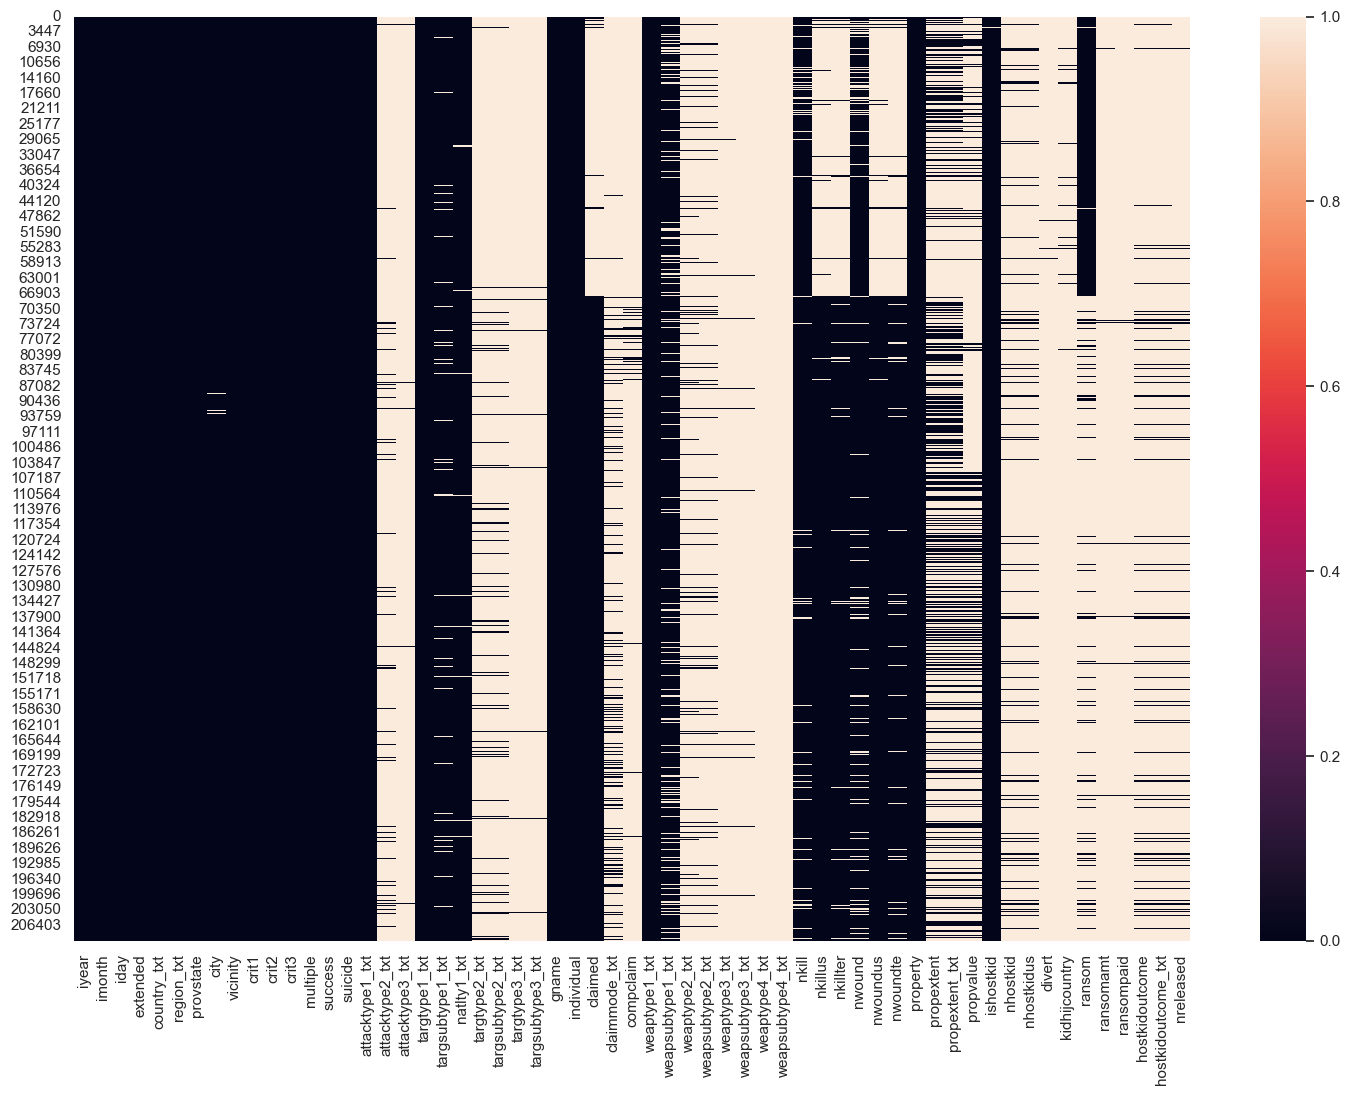

In [17]:
plt.figure(figsize = (18, 12))
sns.heatmap(data.isna())
plt.show()

In [18]:
((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending = False)

weapsubtype4_txt      99.964552
weaptype4_txt         99.963033
divert                99.832380
attacktype3_txt       99.680966
ransompaid            99.520942
targsubtype3_txt      99.248497
ransomamt             99.229254
targtype3_txt         99.204947
weapsubtype3_txt      98.982635
weaptype3_txt         98.860086
kidhijcountry         98.377483
compclaim             97.537360
attacktype2_txt       95.821159
nreleased             93.264834
targsubtype2_txt      93.074933
weapsubtype2_txt      92.975677
hostkidoutcome        92.963017
hostkidoutcome_txt    92.963017
targtype2_txt         92.809071
weaptype2_txt         91.977050
nhostkidus            91.749675
nhostkid              91.721822
claimmode_txt         87.917213
propvalue             77.611903
propextent_txt        65.427329
propextent            65.427329
ransom                63.224473
nwoundte              31.978873
nkillter              30.619686
claimed               29.611943
nwoundus              28.991599
nkillus 

### 1. Extremely High Missingness (>95%)  
**Columns:**  
`weapsubtype4_txt`, `weaptype4_txt`, `divert`, `attacktype3_txt`, `ransompaid`,  
`targsubtype3_txt`, `ransomamt`, `targtype3_txt`, `weapsubtype3_txt`,  
`weaptype3_txt`, `kidhijcountry`, `compclaim`, `attacktype2_txt`  

**Technique:**  
 **Dropped** (too sparse, not analytically useful).  

###  2. Very High Missingness (70–95%)  
**Columns:**  
`nreleased`, `weapsubtype2_txt`, `hostkidoutcome`, `hostkidoutcome_txt`,  
`targtype2_txt`, `weaptype2_txt`, `nhostkidus`, `nhostkid`,  
`claimmode_txt`, `propvalue`, `propextent`, `propextent_txt`, `ransom`  

**Technique:**  
- **Categorical:** Imputed with `"Unknown"`  
- **Numeric:** Imputed with `0` (absence or unrecorded value).  

### 3. Moderate Missingness (10–40%)  
**Columns:**  
`nwoundte`, `nkillter`, `claimed`, `nwoundus`, `nkillus`  

**Technique:**  
- **Numeric:** Imputed with `0` (assumed none if missing).  
- **Categorical:** Imputed with `"Unknown"`.  

###  4. Low Missingness (<10%)  
**Columns:**  
`nwound`, `nkill`, `targsubtype1_txt`, `natlty1_txt`,  
`city`, `ishostkid`, `multiple`  

**Technique:**  
- **Numeric:** Imputed with `0`  
- **Categorical:** Imputed with `"Unknown"`  
- **Binary flags (0/1):** Imputed with `0`  

### Final Strategy  
- **Dropped** extremely sparse columns (>95% missing).  
- **Imputed numeric values** with `0` where missing implies absence.  
- **Imputed categorical values** with `"Unknown"` to preserve information.  
- **Imputed binary flags** with `0` as default.  

In [16]:
# Drop extremely sparse columns (>95% missing)
drop_sparse = [
    "weapsubtype4_txt","weaptype4_txt","divert","attacktype3_txt",
    "ransompaid","targsubtype3_txt","ransomamt","targtype3_txt",
    "weapsubtype3_txt","weaptype3_txt","kidhijcountry","compclaim",
    "attacktype2_txt", "nhostkid", "nhostkidus", "targsubtype2_txt", "weapsubtype1_txt"
]
data = data.drop(columns=[col for col in drop_sparse if col in data.columns])

In [17]:
# Impute numeric columns with 0
num_impute_zero = ["nreleased","propvalue","nwoundte","nkillter",
                   "nwoundus","nkillus","nwound","nkill"]
for col in num_impute_zero:
    if col in data.columns:
        data[col] = data[col].fillna(0)

In [18]:
# Impute categorical columns with "Unknown"
cat_impute_unknown = ["weapsubtype2_txt","hostkidoutcome","hostkidoutcome_txt",
                      "targtype2_txt","weaptype2_txt","claimmode_txt",
                      "propextent","propextent_txt","ransom","claimed",
                      "targsubtype1_txt","natlty1_txt","city"]
for col in cat_impute_unknown:
    if col in data.columns:
        data[col] = data[col].fillna("Unknown")

In [19]:
# Impute binary columns with 0
binary_impute_zero = ["ishostkid","multiple"]
for col in binary_impute_zero:
    if col in data.columns:
        data[col] = data[col].fillna(0)

In [20]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'vicinity', 'crit1', 'crit2', 'crit3', 'multiple',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'targtype2_txt', 'gname',
       'individual', 'claimed', 'claimmode_txt', 'weaptype1_txt',
       'weaptype2_txt', 'weapsubtype2_txt', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'ishostkid', 'ransom', 'hostkidoutcome',
       'hostkidoutcome_txt', 'nreleased'],
      dtype='object')

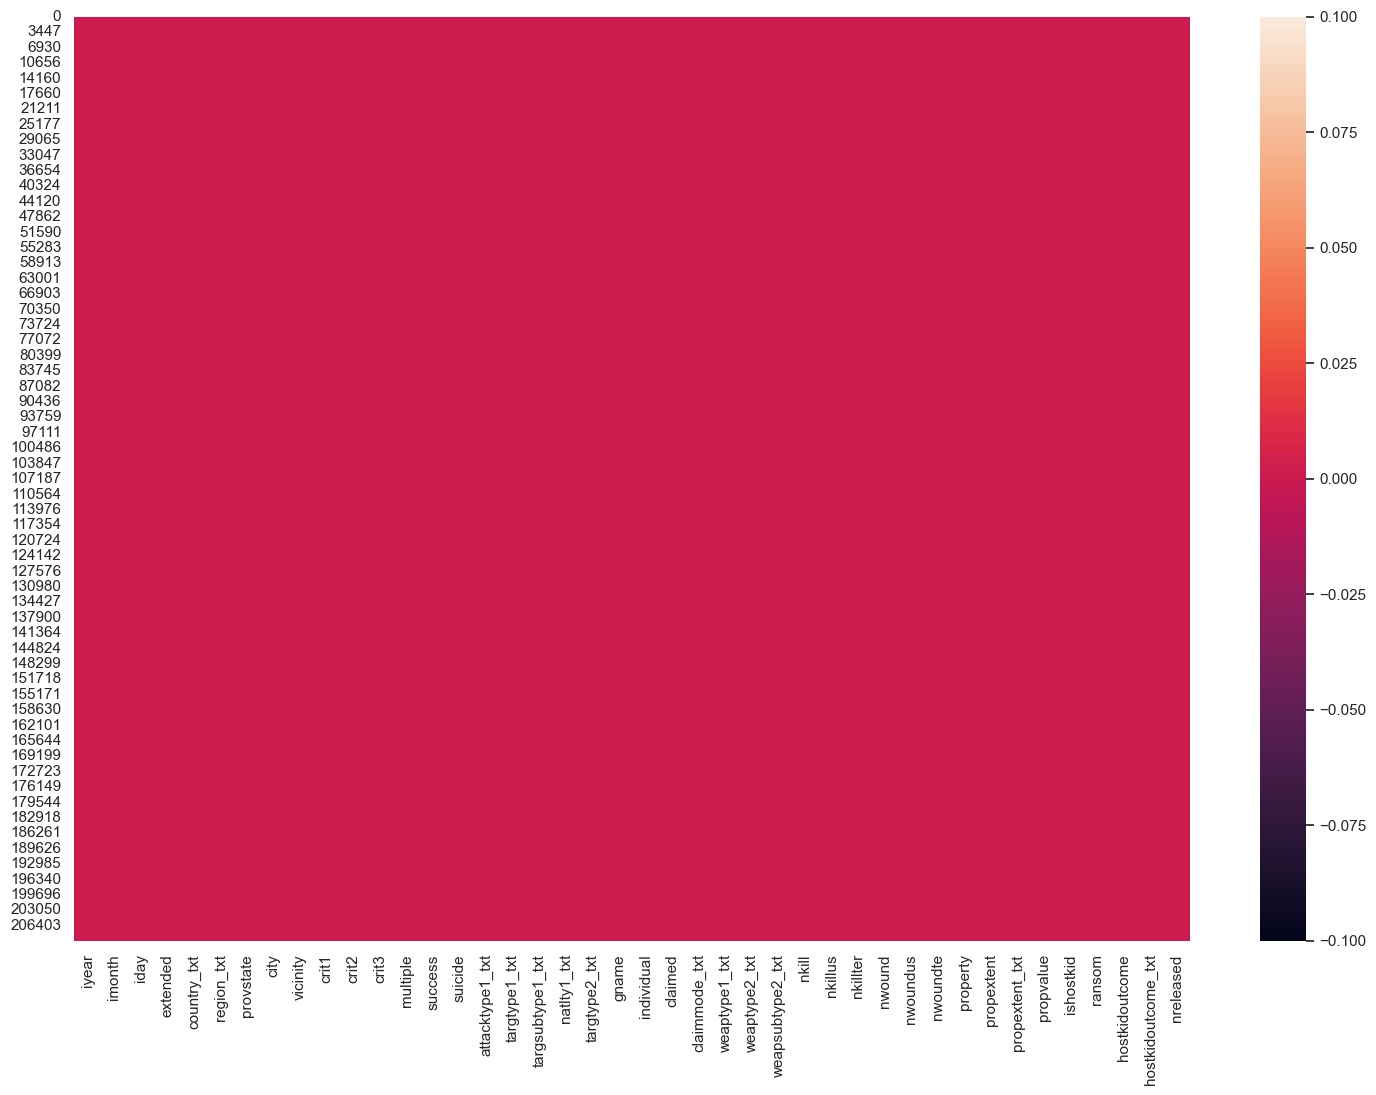

In [23]:
plt.figure(figsize = (18, 12))
sns.heatmap(data.isna())
plt.show()

In [21]:
((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending = False)

iyear                 0.0
imonth                0.0
iday                  0.0
extended              0.0
country_txt           0.0
region_txt            0.0
provstate             0.0
city                  0.0
vicinity              0.0
crit1                 0.0
crit2                 0.0
crit3                 0.0
multiple              0.0
success               0.0
suicide               0.0
attacktype1_txt       0.0
targtype1_txt         0.0
targsubtype1_txt      0.0
natlty1_txt           0.0
targtype2_txt         0.0
gname                 0.0
individual            0.0
claimed               0.0
claimmode_txt         0.0
weaptype1_txt         0.0
weaptype2_txt         0.0
weapsubtype2_txt      0.0
nkill                 0.0
nkillus               0.0
nkillter              0.0
nwound                0.0
nwoundus              0.0
nwoundte              0.0
property              0.0
propextent            0.0
propextent_txt        0.0
propvalue             0.0
ishostkid             0.0
ransom      

### Converting the `imonth` column into month names (January, February,.).

In [25]:
data['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [22]:
month_dict = {
    0: "Unknown",
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Map numeric month values to text
data['month_txt'] = data['imonth'].map(month_dict)

In [27]:
data.head(10)

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,vicinity,crit1,crit2,crit3,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,targtype2_txt,gname,individual,claimed,claimmode_txt,weaptype1_txt,weaptype2_txt,weapsubtype2_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,ransom,hostkidoutcome,hostkidoutcome_txt,nreleased,month_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,National,Santo Domingo,0,1,1,1,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,Unknown,MANO-D,0,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,July
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,0,1,1,1,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,Unknown,23rd of September Communist League,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,1.0,1.0,Unknown,Unknown,0.0,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,0,1,1,1,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,0,1,1,1,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Unknown,0,Unknown,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Unknown,0,Unknown,Unknown,Incendiary,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
5,1970,1,1,0,United States,North America,Illinois,Cairo,0,1,1,1,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",United States,Unknown,Black Nationalists,0,0.0,Unknown,Firearms,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,0.0,0.0,Unknown,Unknown,0.0,January
6,1970,1,2,0,Uruguay,South America,Montevideo,Montevideo,0,1,1,1,0.0,0,0,Assassination,Police,Police Security Forces/Officers,Uruguay,Unknown,Tupamaros (Uruguay),0,Unknown,Unknown,Firearms,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
7,1970,1,2,0,United States,North America,California,Oakland,0,1,1,1,0.0,1,0,Bombing/Explosion,Utilities,Electricity,United States,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),22500.0,0.0,0.0,Unknown,Unknown,0.0,January
8,1970,1,2,0,United States,North America,Wisconsin,Madison,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,United States,Unknown,New Year's Gang,0,1.0,Letter,Incendiary,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),60000.0,0.0,0.0,Unknown,Unknown,0.0,January
9,1970,1,3,0,United States,North America,Wisconsin,Madison,0,1,1,1,0.0,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,United States,Unknown,New Year's Gang,0,0.0,Unknown,Incendiary,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,0.0,0.0,Unknown,Unknown,0.0,January


### Renaming Columns

In [28]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'vicinity', 'crit1', 'crit2', 'crit3', 'multiple',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'targtype2_txt', 'gname',
       'individual', 'claimed', 'claimmode_txt', 'weaptype1_txt',
       'weaptype2_txt', 'weapsubtype2_txt', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'ishostkid', 'ransom', 'hostkidoutcome',
       'hostkidoutcome_txt', 'nreleased', 'month_txt'],
      dtype='object')

In [23]:
rename_dict = {
    "iyear": "year",
    "imonth": "month",
    "iday": "day",
    "extended": "extended_event",
    "country_txt": "country",
    "region_txt": "region",
    "provstate": "province_state",
    "city": "city",
    "vicinity": "vicinity_area",
    "crit1": "criteria_political",
    "crit2": "criteria_economic",
    "crit3": "criteria_religious",
    "multiple": "multiple_attacks",
    "success": "successful_attack",
    "suicide": "suicide_attack",
    "attacktype1_txt": "primary_attack_type",
    "targtype1_txt": "primary_target_type",
    "targsubtype1_txt": "primary_target_subtype",
    "natlty1_txt": "target_nationality",
    "targtype2_txt": "secondary_target_type",
    "gname": "group_name",
    "individual": "individual_attack",
    "claimed": "attack_claimed",
    "claimmode_txt": "claim_mode",
    "weaptype1_txt": "primary_weapon_type",
    "weaptype2_txt": "secondary_weapon_type",
    "weapsubtype2_txt": "secondary_weapon_subtype",
    "nkill": "num_killed",
    "nkillus": "num_killed_us",
    "nkillter": "num_killed_terrorists",
    "nwound": "num_wounded",
    "nwoundus": "num_wounded_us",
    "nwoundte": "num_wounded_terrorists",
    "property": "property_damage",
    "propextent": "property_extent_code",
    "propextent_txt": "property_extent",
    "propvalue": "property_value",
    "ishostkid": "hostage_incident",
    "ransom": "ransom_demanded",
    "hostkidoutcome": "hostage_outcome_code",
    "hostkidoutcome_txt": "hostage_outcome",
    "nreleased": "num_released",
    "month_txt": "month_name"
}

# Apply renaming
data = data.rename(columns = rename_dict)

In [24]:
data['attack_claimed'].replace(['Unknown', -9.0], data['attack_claimed'].mode()[0], inplace=True)
data['ransom_demanded'].replace(['Unknown', -9.0], data['ransom_demanded'].mode()[0], inplace=True)
data['ransom_demanded'].replace(['Unknown'], 0, inplace=True)
data['property_damage'].replace([-9.0], data['property_damage'].mode()[0], inplace=True)

In [25]:
print(data.columns)

Index(['year', 'month', 'day', 'extended_event', 'country', 'region',
       'province_state', 'city', 'vicinity_area', 'criteria_political',
       'criteria_economic', 'criteria_religious', 'multiple_attacks',
       'successful_attack', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'claim_mode', 'primary_weapon_type',
       'secondary_weapon_type', 'secondary_weapon_subtype', 'num_killed',
       'num_killed_us', 'num_killed_terrorists', 'num_wounded',
       'num_wounded_us', 'num_wounded_terrorists', 'property_damage',
       'property_extent_code', 'property_extent', 'property_value',
       'hostage_incident', 'ransom_demanded', 'hostage_outcome_code',
       'hostage_outcome', 'num_released', 'month_name'],
      dtype='object')


## Displaying Categorical Variables

In [26]:
categorical_cols = data.select_dtypes(include = ['object']).columns

# loop through each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(data[col].unique())   
    print("-" * 50)

Column: country
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'Brunei' 'Zaire' "People's Republic of the Congo" 'Portugal'
 'Algeria' 'El Salvador' 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus'
 'Myanmar' 'Afghanistan' 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador'
 'New Zealand' 'Malaysia' 'Singapore' 'Botswana' 'Jamaica' 'Chad'
 'North Yemen' 'Andorra' 'Syria' 'South Korea' 'United Arab Emirates'
 'South Africa' 'Kenya' 'Iraq' 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia'
 '

---

## **Exploratory Data Analysis (EDA)**

### Number Of Terrorist Activities Each Year

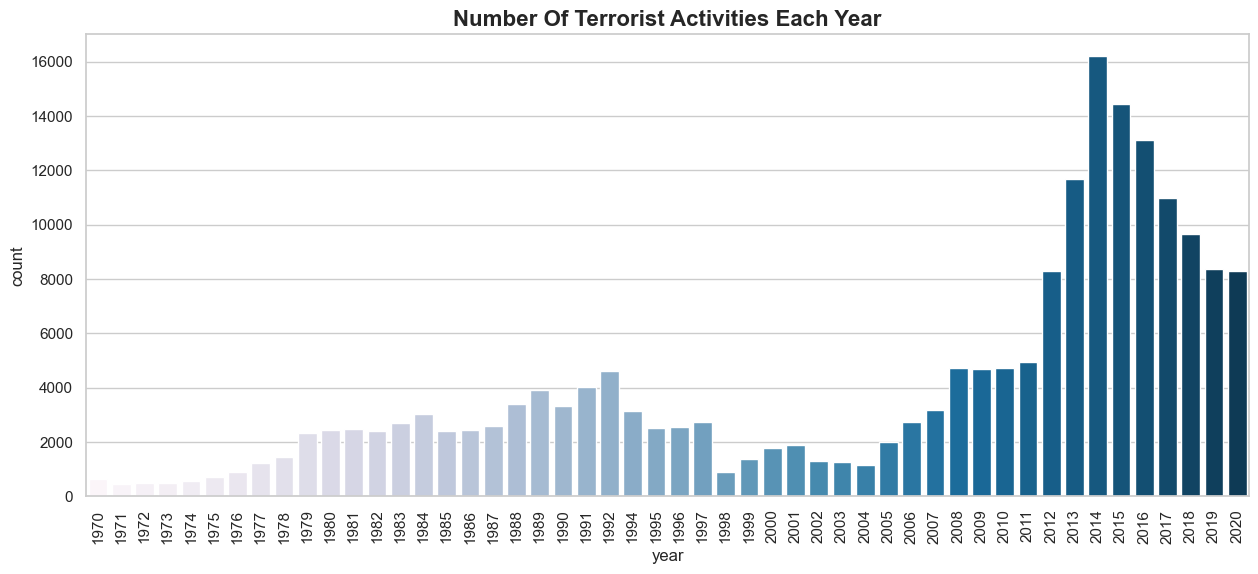

In [25]:
plt.figure(figsize=(15, 6))
year_order = sorted(data['year'].unique(), reverse=False)
sns.countplot(x='year', data=data, palette='PuBu', order = year_order)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year', size = 16, weight='bold')
plt.show()

The plot reveals that the number of terrorist activities was low and relatively stable from 1970 to the early 2000s.   
A dramatic surge began in the mid-2000s, with activity peaking significantly around 2014-2015. Following this peak, the total number of incidents shows a clear decline toward 2020, though the annual count remains substantially higher than pre-2010 levels.

### Top 20 Countries by Number of Accidents

In [ ]:
top_20_c = data['country'].value_counts().sort_values(ascending = False).head(20)
top_20_c

country
Iraq                        25954
Afghanistan                 18522
Pakistan                    14762
India                       13432
Philippines                  8092
Colombia                     8014
Yemen                        5822
Nigeria                      5384
Somalia                      5237
United Kingdom               5179
Peru                         4960
El Salvador                  4259
Turkey                       4233
Thailand                     4002
Spain                        3050
United States                3001
Sri Lanka                    2921
Syria                        2820
Algeria                      2729
West Bank and Gaza Strip     2626
Name: count, dtype: int64

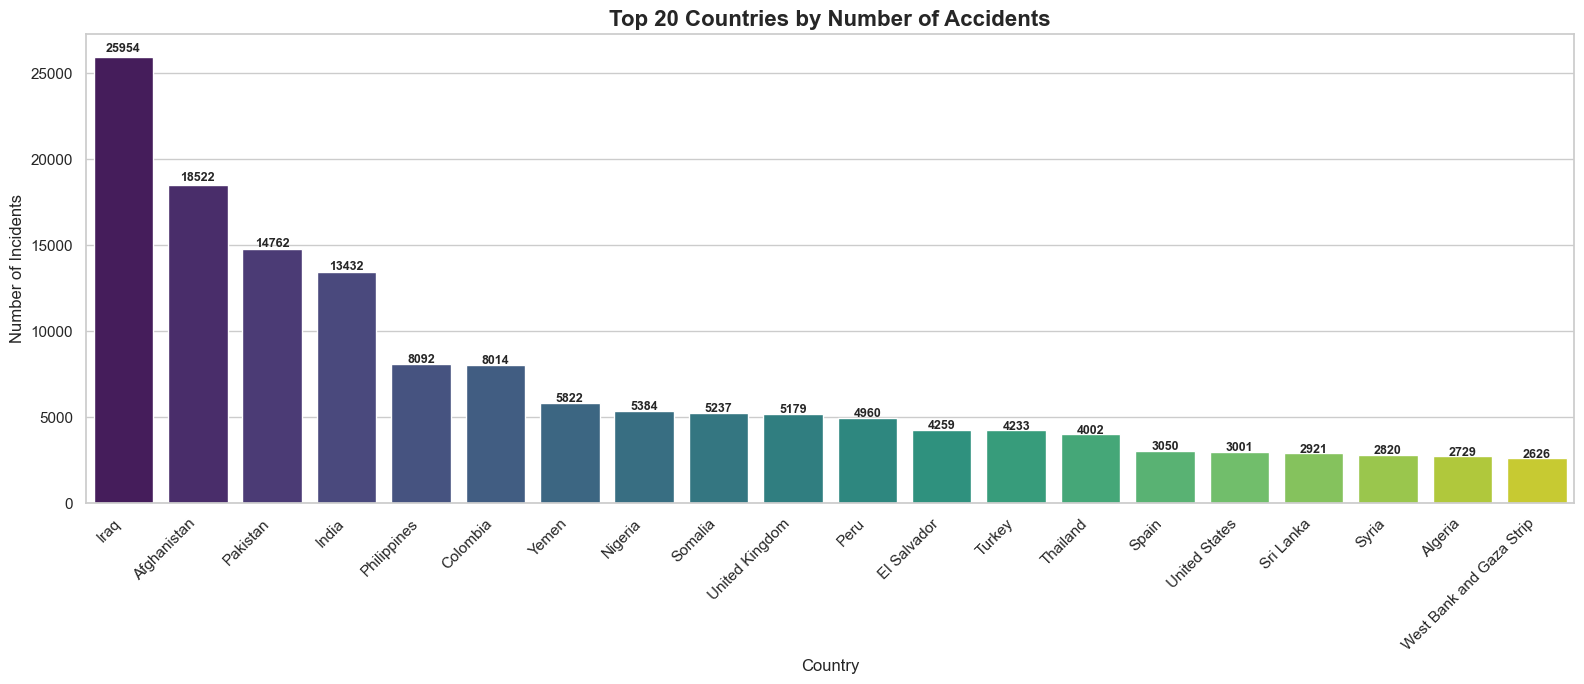

In [112]:
plt.figure(figsize = (16, 7))
sns.barplot(x = top_20_c.index, y = top_20_c.values, palette='viridis')
plt.title('Top 20 Countries by Number of Accidents', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation = 45, ha='right')
for i, v in enumerate(top_20_c.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

### Killings in Global Terrorism

In [121]:
!pip install squarify

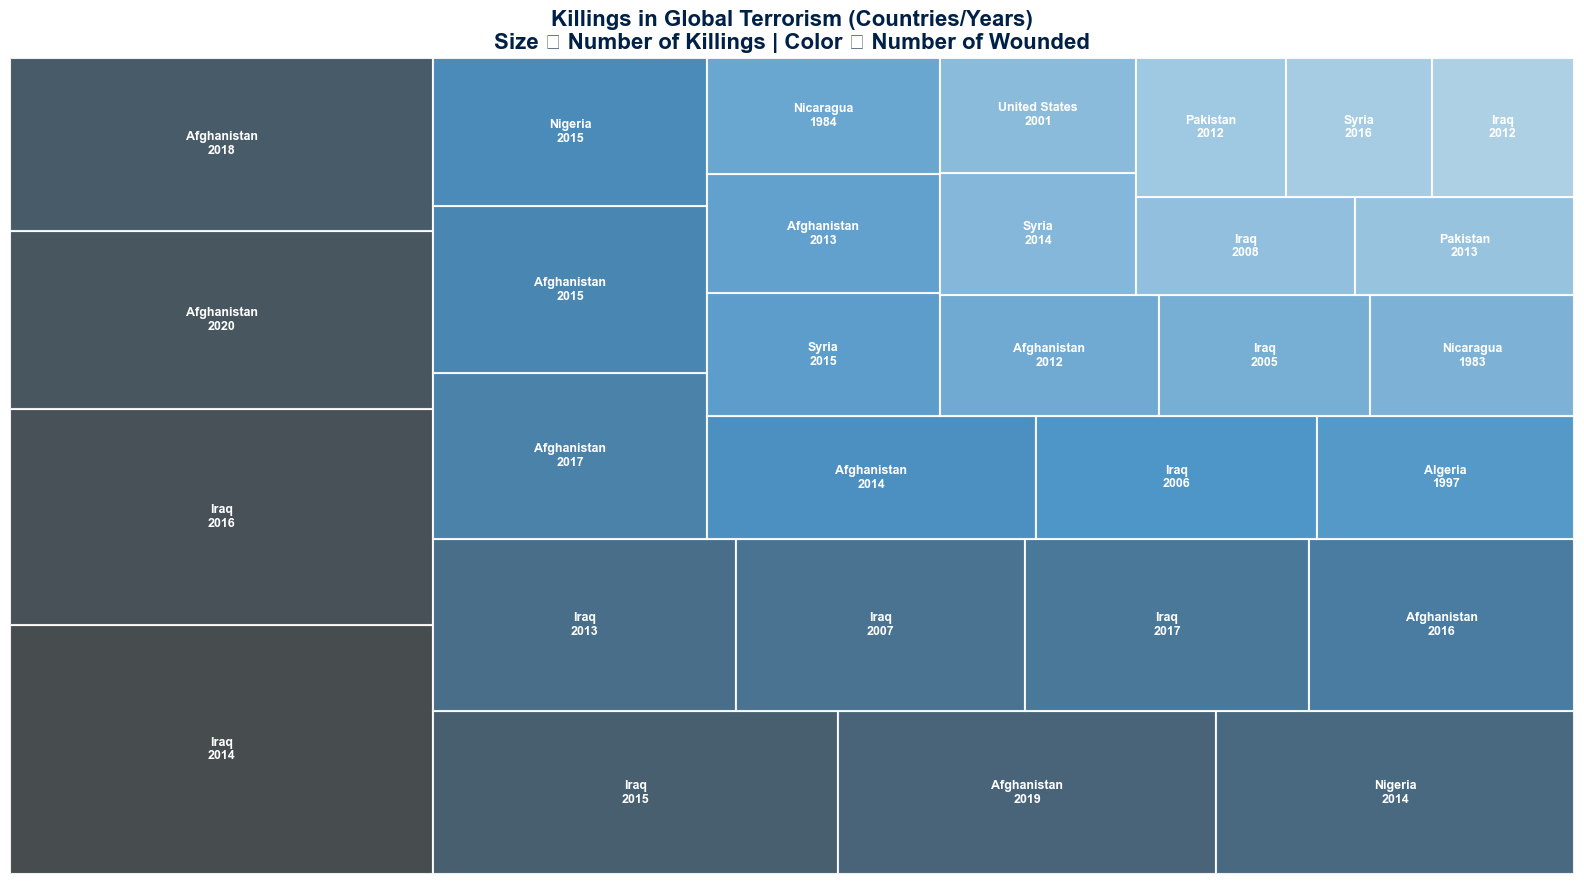

In [ ]:
import squarify

# Prepare data
grouped = data.groupby(['country', 'year']).agg({
    'num_killed': 'sum',
    'num_wounded': 'sum'
}).reset_index()

# Take top 30 by number of killings
grouped = grouped.sort_values('num_killed', ascending=False).head(30)

# Create discrete blue gradient
palette = sns.color_palette("Blues_d", n_colors=len(grouped))
colors = list(reversed(palette))  # Optional: reverse for darker = higher

# Labels: country + year
labels = [f"{c}\n{y}" for c, y in zip(grouped['country'], grouped['year'])]

# Treemap
plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=grouped['num_killed'],
    label=labels,
    color=colors,
    alpha=0.9,
    edgecolor='white',
    linewidth=1.5,
    text_kwargs={'fontsize':9, 'color':'white', 'weight':'bold'}
)

# Titles and design
plt.title(
    "Killings in Global Terrorism (Countries/Years)\n"
    "Size ∝ Number of Killings | Color ∝ Number of Wounded",
    fontsize=16, weight='bold', color='#002147'
)
plt.axis('off')
plt.tight_layout()
plt.show()

This treemap illustrates the most severe terrorism incidents by showing that the size of each box represents the number of killings, and the color (darker shades) represents the number of wounded for a given country and year. The chart is overwhelmingly dominated by high-fatality incidents in Iraq and Afghanistan, particularly during the peak period of 2014 to 2016, with Iraq 2014 and Iraq 2016 representing the two largest total numbers of killings. Additionally, these high-fatality incidents, including those from Nigeria and Syria, typically feature a darker color, indicating a high corresponding number of wounded individuals, starkly contrasting with smaller, lighter-colored historical events like those in Nicaragua or even the United States in 2001.

### Accidents by Region

In [33]:
data['region'].value_counts()

region
Middle East & North Africa     55616
South Asia                     52700
Sub-Saharan Africa             23016
South America                  17159
Western Europe                 15609
Southeast Asia                 13930
Central America & Caribbean     9002
Eastern Europe                  5148
North America                   3681
East Asia                        734
Central Asia                     566
Australasia & Oceania            310
Name: count, dtype: int64

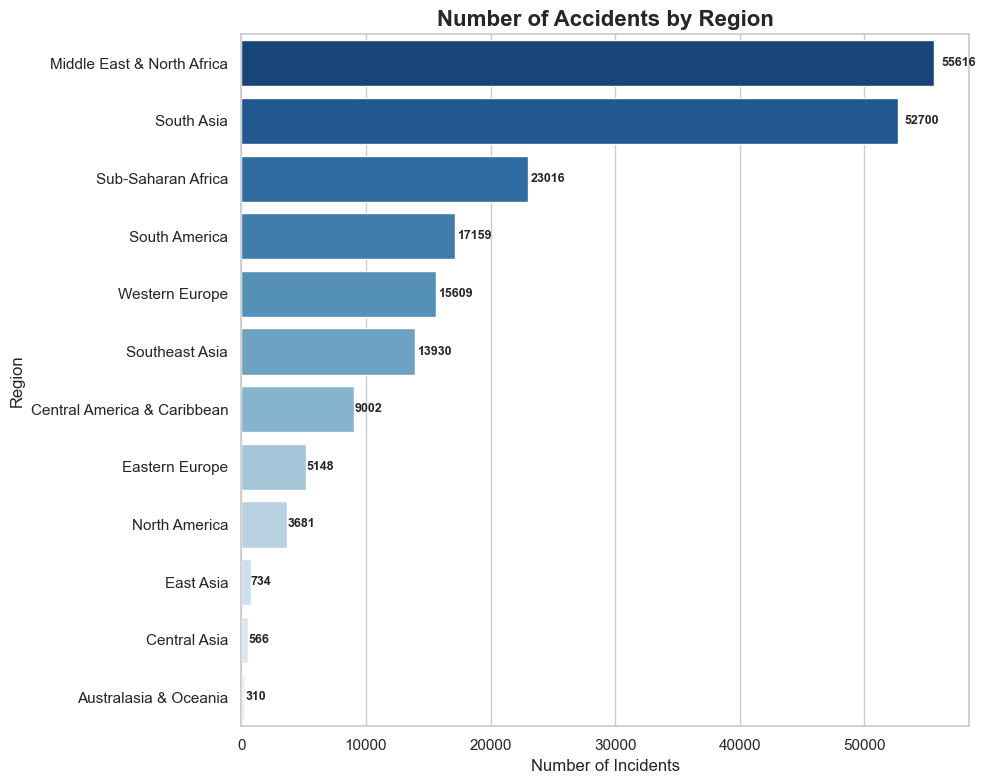

In [ ]:
plt.figure(figsize=(10, 8))

region_counts = data['region'].value_counts()

sns.barplot(
    y=region_counts.index,
    x=region_counts.values,
    palette='Blues_r'
)
plt.title('Number of Accidents by Region', fontsize=16, weight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Region', fontsize=12)

for i, v in enumerate(region_counts.values):
    plt.text(v + (v * 0.01), i, str(v), va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['year', 'month', 'day', 'extended_event', 'country', 'region',
       'province_state', 'city', 'vicinity_area', 'criteria_political',
       'criteria_economic', 'criteria_religious', 'multiple_attacks',
       'successful_attack', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'claim_mode', 'primary_weapon_type',
       'secondary_weapon_type', 'secondary_weapon_subtype', 'num_killed',
       'num_killed_us', 'num_killed_terrorists', 'num_wounded',
       'num_wounded_us', 'num_wounded_terrorists', 'property_damage',
       'property_extent_code', 'property_extent', 'property_value',
       'hostage_incident', 'ransom_demanded', 'hostage_outcome_code',
       'hostage_outcome', 'num_released', 'month_name'],
      dtype='object')

### Terrorist Activities by Region Over Time

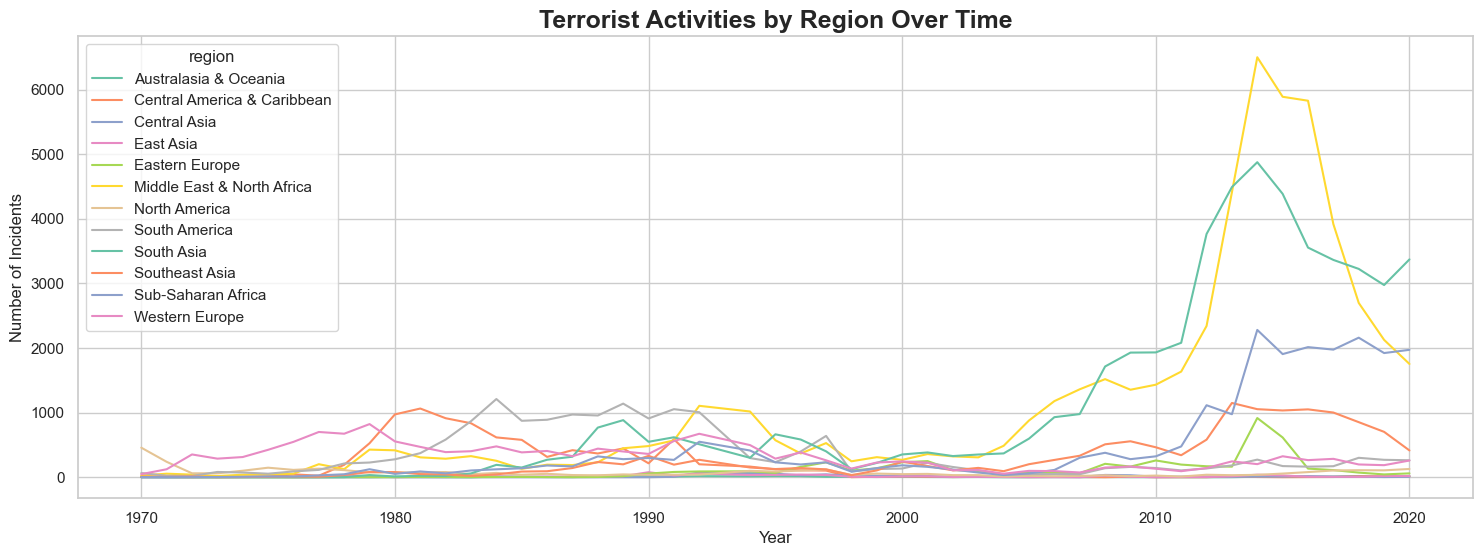

In [103]:
terror_region=pd.crosstab(data.year, data.region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title('Terrorist Activities by Region Over Time', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
fig.set_size_inches(18,6)
plt.show()

This line plot illustrates a significant geographical shift in global terrorism. From 1970 to the mid-2000s, terrorist incidents were moderate and dispersed, with peaks often seen in regions like Western Europe and South America. However, a profound and rapid change began around 2005, marked by the massive, simultaneous escalation of activity in the Middle East & North Africa (peaking highest around 2014) and South Asia (peaking around 2014-2015), which quickly became the overwhelming centers of global terrorism. By the end of the period, while overall incidents had decreased from the mid-2010s peak, these two regions, along with a rising trend in Sub-Saharan Africa, firmly remained the most afflicted areas globally.

### Top 20 Provinces/States by Number of Accidents

In [36]:
top_20_p = data['province_state'].value_counts().sort_values(ascending = False).head(20)

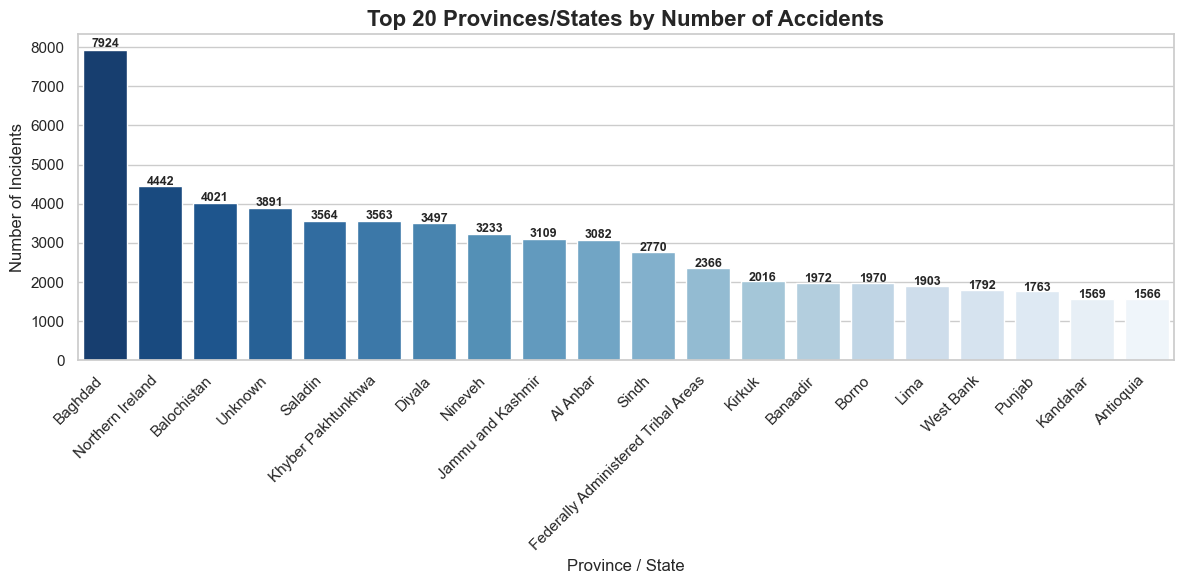

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_p.index, y=top_20_p.values, palette='Blues_r')

plt.title('Top 20 Provinces/States by Number of Accidents', fontsize=16, weight='bold')
plt.xlabel('Province / State', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(top_20_p.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Vicinity Area Distribution

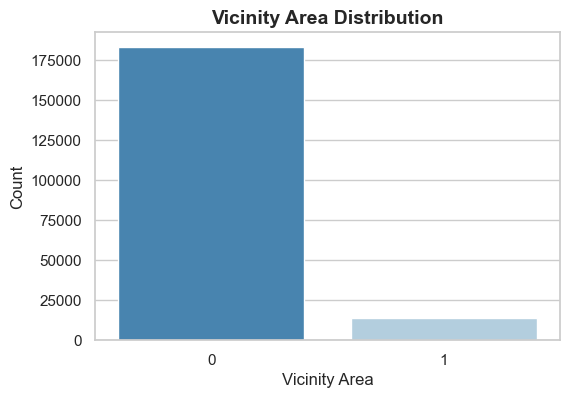

In [50]:
# Replace -9 with mode value
mode_value = data['vicinity_area'].mode()[0]
data['vicinity_area'].replace(-9, mode_value, inplace=True)

# Plot the counts
plt.figure(figsize=(6, 4))
sns.countplot(x='vicinity_area', data=data, palette='Blues_r')
plt.title('Vicinity Area Distribution', fontsize=14, weight='bold')
plt.xlabel('Vicinity Area')
plt.ylabel('Count')
plt.show()

Most terrorist attacks occurred within cities or towns, not in rural or remote areas.

### Criteria Types

In [2]:
criteria = pd.Series({
    'Religious': sum(data.criteria_religious),
    'Economic': sum(data.criteria_economic),
    'Political': sum(data.criteria_political)
})

labels = criteria.index 
sizes = criteria.values   
explode = [0.04 if v != max(sizes) else 0.06 for v in sizes]

plt.figure(figsize=(12, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode = explode,
    textprops={'fontsize': 12, 'weight': 'bold'},
    colors=plt.cm.Blues(np.linspace(0.3, 1, len(labels)))
)
plt.title('Terrorism Criteria Comparison', fontsize=16, weight='bold')
plt.show()

NameError: name 'pd' is not defined

<Figure size 1400x600 with 0 Axes>

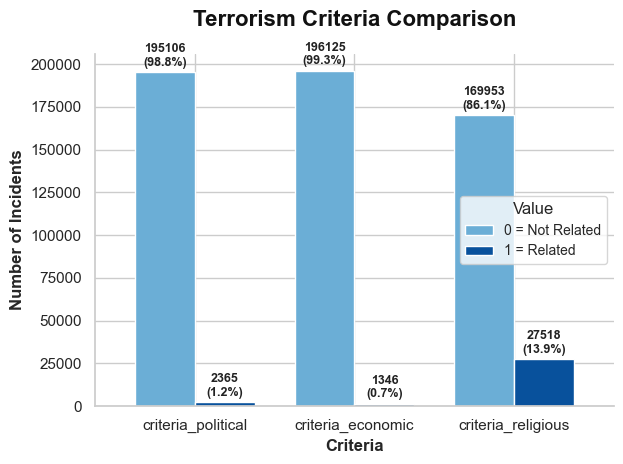

In [98]:
binary_cols = ['criteria_political', 'criteria_economic', 'criteria_religious']

# Count 0s and 1s
binary_counts = data[binary_cols].apply(pd.Series.value_counts).T

# Calculate proportions (%)
binary_props = data[binary_cols].apply(lambda x: x.value_counts(normalize=True)).T * 100

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot the bars
ax = binary_counts.plot(kind='bar', color=["#6BAED6", "#08519C"], width=0.75)

# Titles and labels
plt.title('Terrorism Criteria Comparison', fontsize=16, weight='bold', color="#111111", pad = 20)
plt.xlabel('Criteria', fontsize=12, weight='bold')
plt.ylabel('Number of Incidents', fontsize=12, weight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.legend(['0 = Not Related', '1 = Related'], title='Value', fontsize=10)

# Add both count and percentage labels
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        height = bar.get_height()
        percent = binary_props.iloc[j, i]
        ax.text(
            bar.get_x() + bar.get_width()/2, height + (max(binary_counts.max()) * 0.01),
            f"{int(height)}\n({percent:.1f}%)",
            ha='center', va='bottom', fontsize=9, weight='bold', color='#222222'
        )

plt.tight_layout()
sns.despine()
plt.show()

The analysis reveals that political and economic motivations have minimal influence on terrorism incidents, with only about 1.2% and 0.7% of cases being related to these criteria, respectively. In contrast, religious motivation stands out significantly, with 13.9% of incidents linked to it. This suggests that while the majority of terrorist acts are not directly associated with any of these criteria, religion-related factors play a much more prominent role compared to political or economic ones, indicating that religious motivations are a key driver behind a notable portion of terrorism incidents in the dataset.

### Distribution of Multiple Attacks

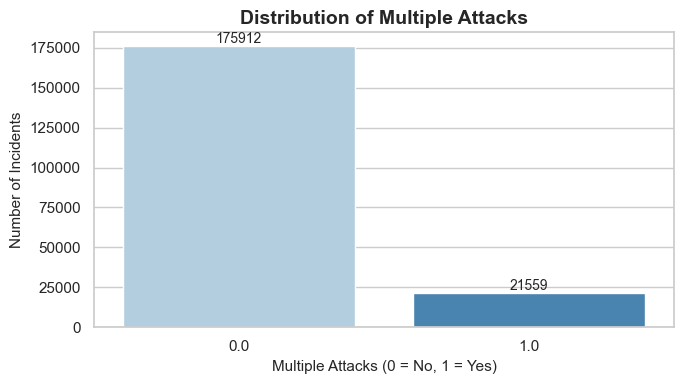

In [ ]:
plt.figure(figsize=(7, 4))
sns.set_style("whitegrid")

sns.countplot(data=data, x='multiple_attacks', palette='Blues')

plt.title('Distribution of Multiple Attacks', fontsize=14, weight='bold')
plt.xlabel('Multiple Attacks (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11)

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### Distribution of Successful Attacks

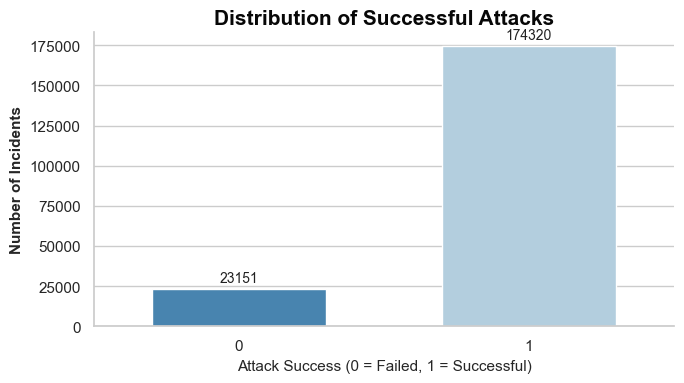

In [76]:
plt.figure(figsize=(7, 4))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=data,
    x='successful_attack',
    palette='Blues_r',
    width=0.6
)

plt.title('Distribution of Successful Attacks', fontsize=15, weight='bold', color="#070707")
plt.xlabel('Attack Success (0 = Failed, 1 = Successful)', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11, weight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='#222222')

# Aesthetic adjustments
sns.despine()
plt.tight_layout()
plt.show()

### Attacking Methods by Terrorists

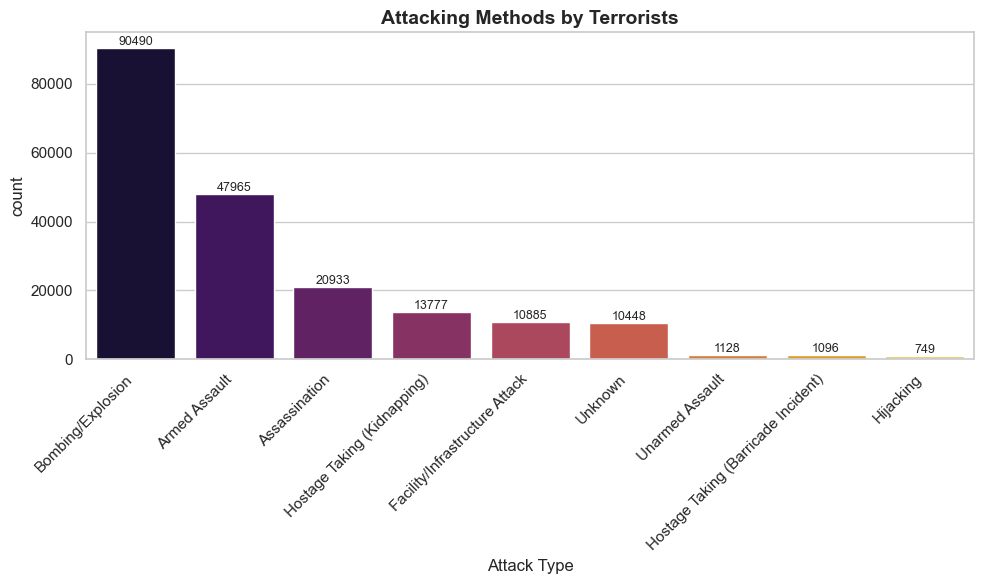

In [97]:
plt.figure(figsize=(10, 6))
attack_order = data['primary_attack_type'].value_counts().index
ax = sns.countplot(
    data=data,
    x='primary_attack_type',
    order=attack_order,
    palette='inferno'
)
plt.xticks(rotation=45, ha='right')
plt.title('Attacking Methods by Terrorists', fontsize=14, weight='bold')
plt.xlabel('Attack Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    
plt.tight_layout()
plt.show()

### Target Types by Terrorists

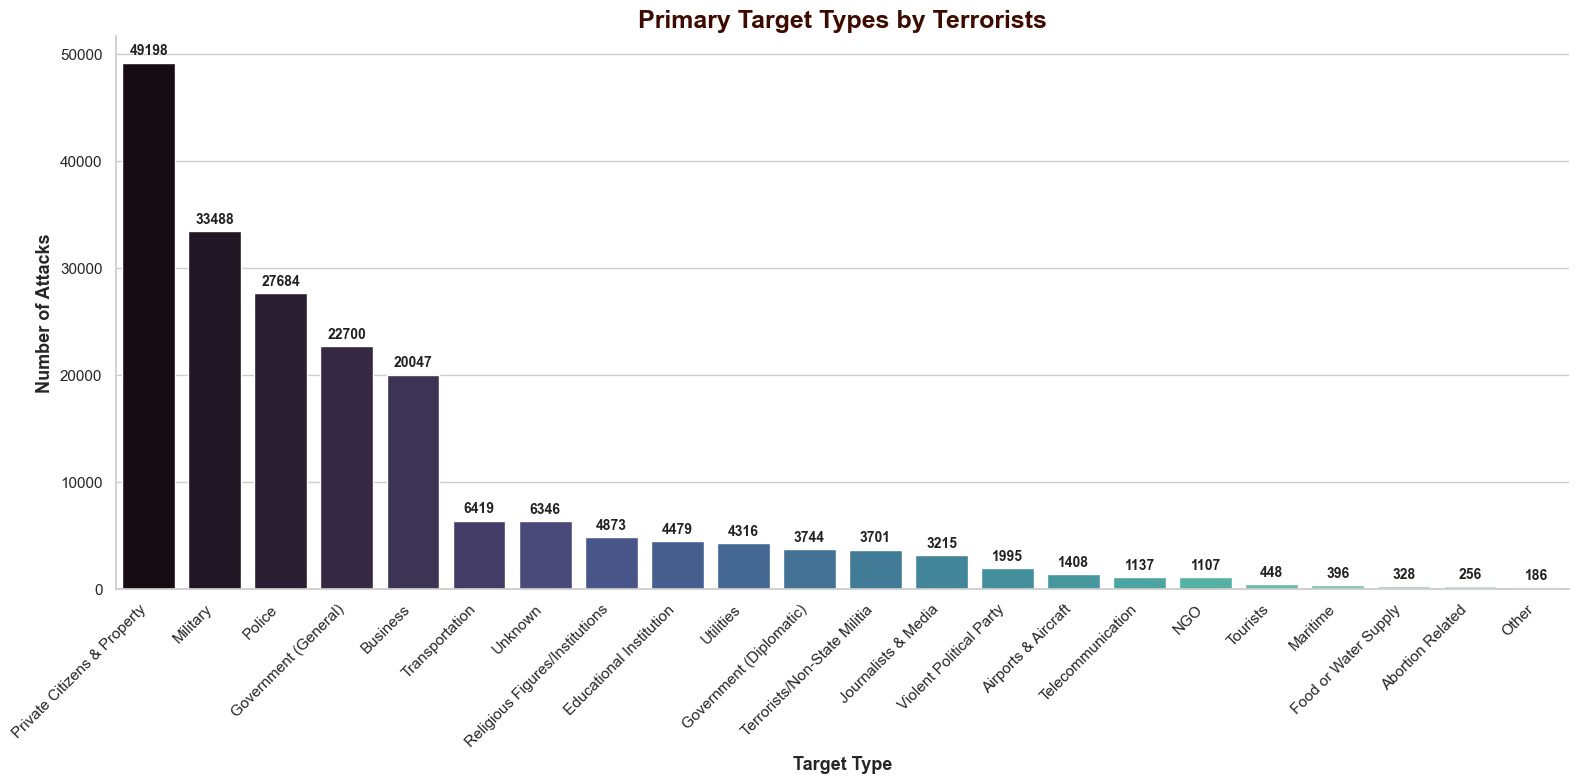

In [105]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Sort by count for consistent order
attack_order = data['primary_target_type'].value_counts().index

# Create the plot
ax = sns.countplot(
    data=data,
    x='primary_target_type',
    order=attack_order,
    palette='mako'
)

# Titles and labels
plt.title('Primary Target Types by Terrorists', fontsize=18, weight='bold', color='#3E0B00')
plt.xlabel('Target Type', fontsize=13, weight='bold')
plt.ylabel('Number of Attacks', fontsize=13, weight='bold')

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, weight='bold', color='#222222')

# Adjust spacing and remove top/right borders
sns.despine()
plt.tight_layout()
plt.show()


In [129]:
data['target_nationality'].value_counts().head(20)

target_nationality
Iraq                25310
Afghanistan         16348
Pakistan            14310
India               13581
Philippines          7869
Colombia             7632
Yemen                5495
Nigeria              5218
United States        5177
Peru                 4729
Turkey               4601
Israel               4299
El Salvador          4156
Somalia              4031
Thailand             3956
Northern Ireland     3395
International        3261
Spain                2920
Sri Lanka            2750
Syria                2690
Name: count, dtype: int64

### Killings in Global Terrorism

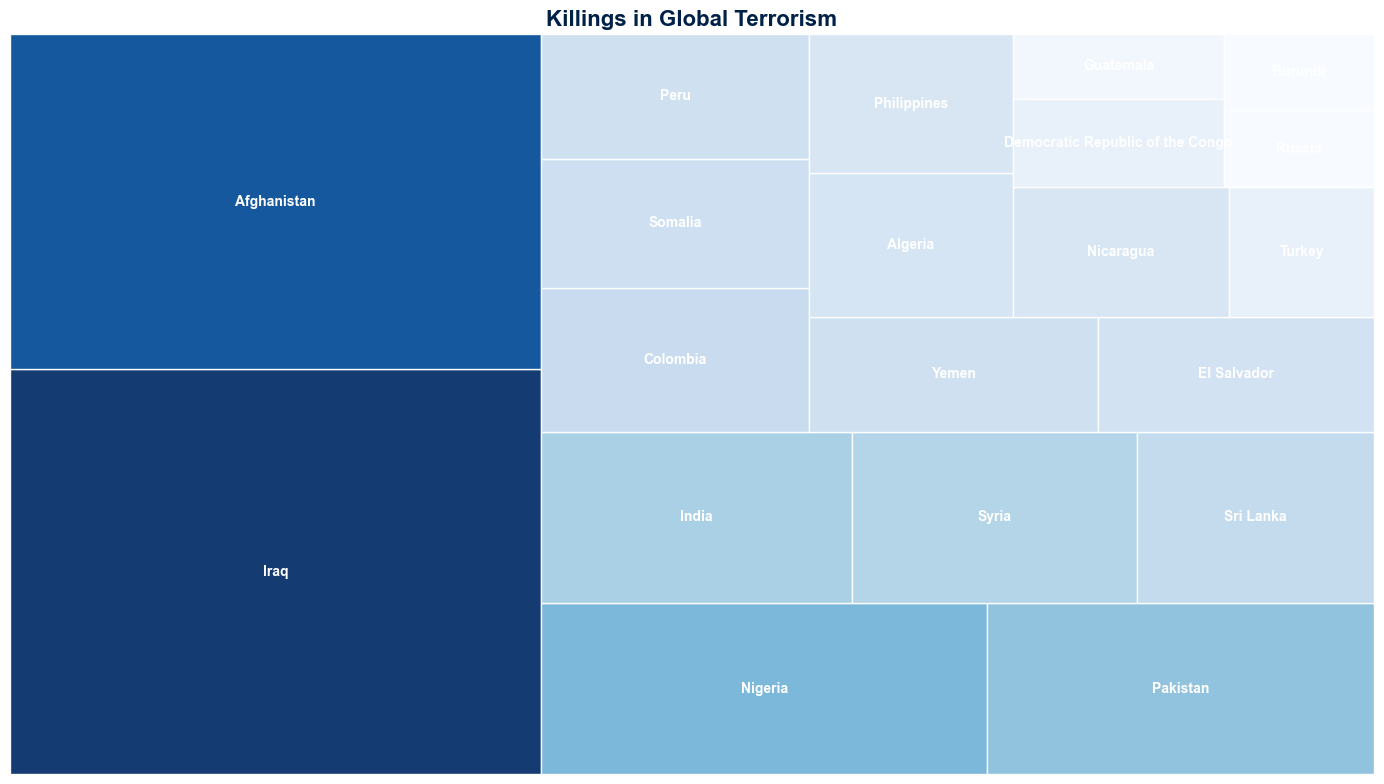

In [ ]:
import squarify
# Prepare the data
country_kills = data.groupby('country')['num_killed'].sum().sort_values(ascending=False).head(20)

# Normalize with stronger contrast (gamma adjustment)
norm = plt.Normalize(np.sqrt(country_kills.min()), np.sqrt(country_kills.max())) 
colors = [plt.cm.Blues(norm(np.sqrt(value))) for value in country_kills.values]   

# Create Treemap
plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=country_kills.values,
    label=country_kills.index,
    color=colors,
    alpha=0.95,
    edgecolor='white',       
    linewidth=1,
    text_kwargs={'fontsize':10, 'weight':'bold', 'color':'white'}
)

# Titles and labels
plt.title("Killings in Global Terrorism", fontsize=16, weight='bold', color='#002147')
plt.axis('off')
plt.tight_layout()
plt.show()

### Terrorist Groups by Number of Attacks

In [146]:
len(data['group_name'].unique())

3725

In [144]:
data['group_name'].value_counts().head(20)

group_name
Unknown                                             87855
Taliban                                             11671
Islamic State of Iraq and the Levant (ISIL)          6676
Al-Shabaab                                           4339
Shining Path (SL)                                    3695
New People's Army (NPA)                              3306
Boko Haram                                           3223
Houthi extremists (Ansar Allah)                      3038
Farabundo Marti National Liberation Front (FMLN)     2489
Kurdistan Workers' Party (PKK)                       2482
Irish Republican Army (IRA)                          2424
Revolutionary Armed Forces of Colombia (FARC)        2357
Maoists                                              2053
Communist Party of India - Maoist (CPI-Maoist)       2049
Basque Fatherland and Freedom (ETA)                  1897
National Liberation Army of Colombia (ELN)           1642
Liberation Tigers of Tamil Eelam (LTTE)              1568
Teh

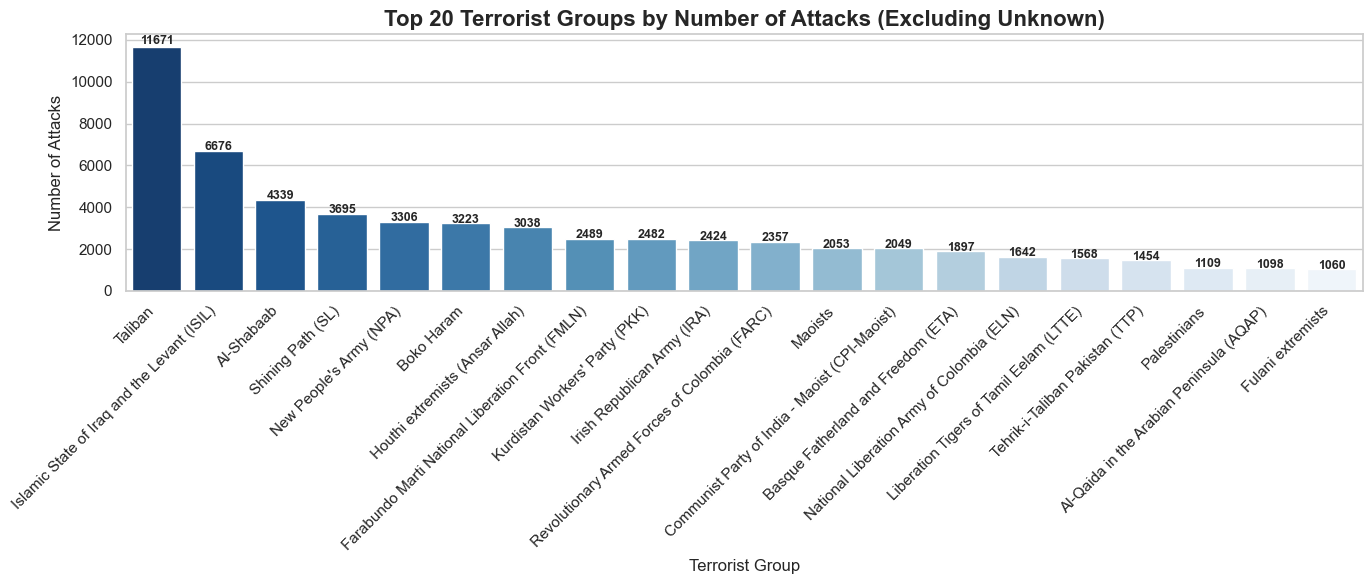

In [151]:
# Remove "Unknown" values
filtered_data = data[data['group_name'] != 'Unknown']

# Get top 20 groups (excluding Unknown)
top_20_g = filtered_data['group_name'].value_counts().head(20)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=top_20_g.index, y=top_20_g.values, palette='Blues_r')

plt.title('Top 20 Terrorist Groups by Number of Attacks (Excluding Unknown)', fontsize=16, weight='bold')
plt.xlabel('Terrorist Group', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, v in enumerate(top_20_g.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Individual Attacks

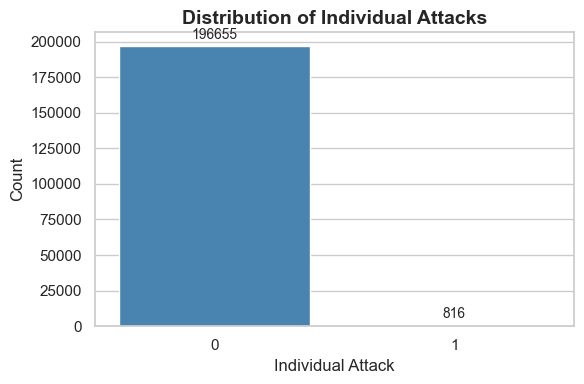

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=data, 
    x='individual_attack', 
    palette='Blues_r'  
)

plt.title('Distribution of Individual Attacks', fontsize=14, weight='bold')
plt.xlabel('Individual Attack', fontsize=12)
plt.ylabel('Count', fontsize=12)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

The plot clearly demonstrates that in this dataset, only a tiny fraction of all terrorist incidents are classified as being carried out by a single individual, while the overwhelming majority are carried out by groups or multiple perpetrators.

### Attack Claim Modes

In [30]:
data['claim_mode'].value_counts()

claim_mode
Unknown                          178282
Personal claim                     6941
Posted to website, blog, etc.      5888
Call (post-incident)               1786
E-mail                             1583
Note left at scene                 1498
Video                               514
Other                               449
Letter                              339
Call (pre-incident)                 190
0                                     1
Name: count, dtype: int64

In [ ]:
labels = data['claim_mode'].value_counts().index[1:]   # skip the first (like 'Unknown')
sizes = data['claim_mode'].value_counts().values[1:]   # skip the first value too

plt.figure(figsize=(12, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Blues(np.linspace(0.3, 1, len(labels)))
)
plt.title('Distribution of Attack Claim Modes (Excluding Unknown)', fontsize=14, weight='bold')
plt.show()

NameError: name 'data' is not defined

---

## **Overall Terrorism KPIs Summary**

### Basic Overview

In [39]:
total_attacks = len(data)
total_countries = data['country'].nunique()
total_groups = data['group_name'].nunique()
total_years = data['year'].nunique()

print('Total Number of Attacks', total_attacks)
print('Total Countries Affected', total_countries)
print('Total Terrorist Groups', total_groups)
print('Total Years Recorded', total_years)

Total Number of Attacks 197471
Total Countries Affected 204
Total Terrorist Groups 3725
Total Years Recorded 50


### Casualty Metrics

In [ ]:
total_killed = data['num_killed'].sum()
total_wounded = data['num_wounded'].sum()
avg_killed_per_attack = round(data['num_killed'].mean(), 2)
avg_wounded_per_attack = round(data['num_wounded'].mean(), 2)
most_lethal_country = data.groupby('country')['num_killed'].sum().idxmax()
most_lethal_group = data[data['group_name'] != 'Unknown'].groupby('group_name')['num_killed'].sum().idxmax()

print('Total Killed', total_killed)
print('Total Wounded', total_wounded)
print('Average Killed per Attack', avg_killed_per_attack)
print('Average Wounded per Attack', avg_wounded_per_attack)
print('Most Lethal Country', most_lethal_country)
print('Most Lethal Group', most_lethal_group)

Total Killed 474052.0
Total Wounded 579462.0
Average Killed per Attack 2.4
Average Wounded per Attack 2.93
Most Lethal Country Iraq
Most Lethal Group Taliban


### Attack Statistics and Impact Overview

In [53]:
attacks_by_year = data.groupby('year').size()
deadliest_year = attacks_by_year.idxmax()
attacks_by_region = data['region'].value_counts()
attacks_by_attack_type = data['primary_attack_type'].value_counts()
successful_ratio = (data['successful_attack'].mean()) * 100
suicide_ratio = (data['suicide_attack'].mean()) * 100
individual_ratio = (data['individual_attack'].mean()) * 100
hostage_cases = data['hostage_incident'].sum()
avg_ransom_demanded = data['ransom_demanded'].mean() * 100
property_damage_ratio = data['property_damage'].mean() * 100
avg_property_value = data['property_value'].replace(0, np.nan).mean()

print('Deadliest Year', deadliest_year)
print('Success Rate (%)', round(successful_ratio, 2))
print('Suicide Attack Rate (%)', round(suicide_ratio, 2))
print('Individual Attack Rate (%)', round(individual_ratio, 2))
print('Hostage Cases', int(hostage_cases))
print('Ransom Demanded (%)', round(avg_ransom_demanded, 2))
print('Property Damage (%)', round(property_damage_ratio, 2))
print('Average Property Loss (USD)', round(avg_property_value, 2))

Deadliest Year 2014
Success Rate (%) 88.28
Suicide Attack Rate (%) 3.73
Individual Attack Rate (%) 0.41
Hostage Cases 11183
Ransom Demanded (%) 0.74
Property Damage (%) 61.28
Average Property Loss (USD) 186226.32


----

## Extracracting Egypt Data 

In [34]:
egypt_data = data[data['country'] == 'Egypt']
egypt_data.to_csv('Egypt_data.csv', index = False)

---

In [27]:
data.to_csv('Cleaned_global_data.csv', index = False)

# **Thank You**

##### Next **EGYPT** notebook →

In [ ]:
data.loc[data['country'] == 'Iraq', 'province_state']


KeyboardInterrupt

